In [1]:
# Import lib needed
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Data
imageFinger = 'D:/Studying in FPT University/2022 Semester/7.Summer 2022/IMP301/Project/Image segmentation/data/1.png'
imageOtsu = 'D:/Studying in FPT University/2022 Semester/7.Summer 2022/IMP301/Project/Image segmentation/data/2.png'
imageImproveOtsu = 'D:/Studying in FPT University/2022 Semester/7.Summer 2022/IMP301/Project/Image segmentation/data/3.png'

### Image about introduction

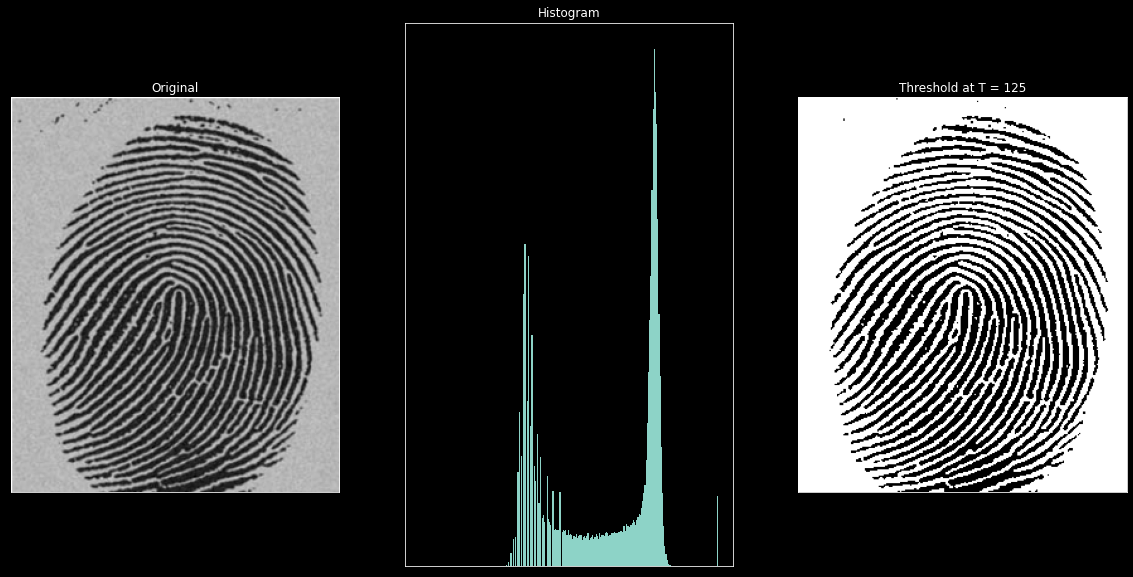

In [8]:
imgFinger = cv2.imread(imageFinger, cv2.IMREAD_GRAYSCALE)
# print(imgFinger)
ret, thresh = cv2.threshold(imgFinger, 125, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(imgFinger, cmap='gray')
ax[0].set_title("Original")
# ax[0].set_facecolor('white')
ax[1].hist(imgFinger.flatten(), 256, [0, 256])
ax[1].set_title("Histogram")
# ax[1].set_facecolor('white')
ax[2].imshow(thresh, cmap='gray')
ax[2].set_title("Threshold at T = 125")
# ax[2].set_facecolor('white')

for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [9]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

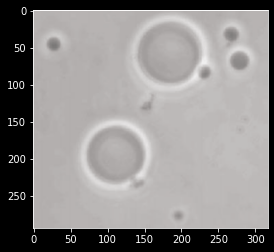

In [10]:
imgOtsu = cv2.imread(imageOtsu)
plt.imshow(imgOtsu)
plt.show()

In [11]:
grayscale = cv2.cvtColor(imgOtsu, cv2.COLOR_BGR2GRAY)

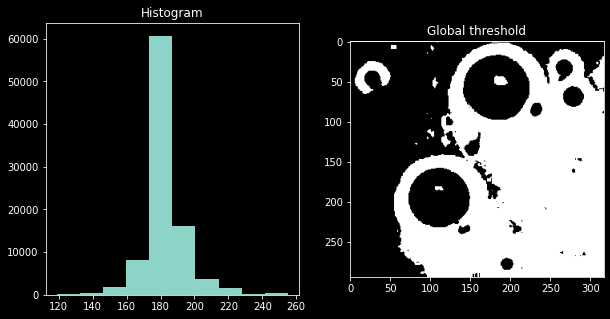

In [12]:
ret, img_thres = cv2.threshold(grayscale, 180, 255, cv2.THRESH_BINARY)

fig, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].hist(grayscale.flatten())
ax[0].set_title('Histogram')
ax[1].imshow(img_thres, cmap="gray")
ax[1].set_title('Global threshold')
plt.show()

In [13]:
def threshold_otsu_implement(image, nbins=0.1):
    
    #validate grayscale
    if len(image.shape) == 1 or len(image.shape) > 2:
        print("Must be a grayscale image.")
        return
    
    #validate multicolored
    if np.min(image) == np.max(image):
        print("The image must have multiple colors")
        return
    
    all_colors = image.flatten()
    total_weight = len(all_colors)
    least_variance = -1
    least_variance_threshold = -1
    
    # create an array of all possible threshold values which we want to loop through
    color_thresholds = np.arange(np.min(image)+nbins, np.max(image)-nbins, nbins)
    
    # loop through the thresholds to find the one with the least within class variance
    for color_threshold in color_thresholds:
        bg_pixels = all_colors[all_colors < color_threshold]
        weight_bg = len(bg_pixels) / total_weight
        variance_bg = np.var(bg_pixels)

        fg_pixels = all_colors[all_colors >= color_threshold]
        weight_fg = len(fg_pixels) / total_weight
        variance_fg = np.var(fg_pixels)

        within_class_variance = weight_fg*variance_fg + weight_bg*variance_bg
        if least_variance == -1 or least_variance > within_class_variance:
            least_variance = within_class_variance
            least_variance_threshold = color_threshold
        print("trace:", within_class_variance, color_threshold)
            
    return least_variance_threshold

trace: 143.65110961603344 119.1
trace: 143.65110961603344 119.19999999999999
trace: 143.65110961603344 119.29999999999998
trace: 143.65110961603344 119.39999999999998
trace: 143.65110961603344 119.49999999999997
trace: 143.65110961603344 119.59999999999997
trace: 143.65110961603344 119.69999999999996
trace: 143.65110961603344 119.79999999999995
trace: 143.65110961603344 119.89999999999995
trace: 143.65110961603344 119.99999999999994
trace: 143.60944077752947 120.09999999999994
trace: 143.60944077752947 120.19999999999993
trace: 143.60944077752947 120.29999999999993
trace: 143.60944077752947 120.39999999999992
trace: 143.60944077752947 120.49999999999991
trace: 143.60944077752947 120.59999999999991
trace: 143.60944077752947 120.6999999999999
trace: 143.60944077752947 120.7999999999999
trace: 143.60944077752947 120.89999999999989
trace: 143.60944077752947 120.99999999999989
trace: 143.44807413482985 121.09999999999988
trace: 143.44807413482985 121.19999999999987
trace: 143.44807413482985

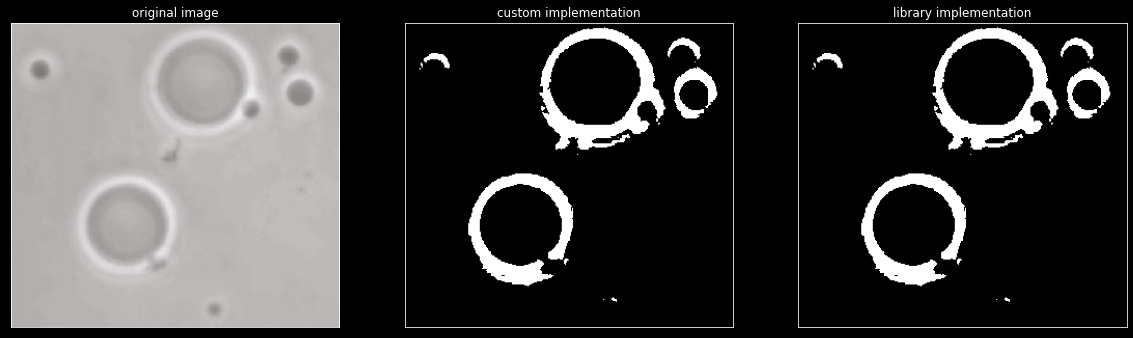

In [14]:
# thresholding the image using our custom implementation
threshold_c = threshold_otsu_implement(grayscale)
# type(threshold_c)
bin_img_from_custom = grayscale > threshold_c

# thresholding the image using the skimage library implementation
threshold_s = threshold_otsu(grayscale)
bin_img_from_lib = grayscale > threshold_s

fig, ax = plt.subplots(ncols=3, figsize=(20, 15))

ax[0].set_title("original image")
ax[0].imshow(imgOtsu, cmap="gray")

ax[1].set_title("custom implementation")
ax[1].imshow(bin_img_from_custom, cmap="gray")

ax[2].set_title("library implementation")
ax[2].imshow(bin_img_from_lib, cmap="gray")

for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()